# CS 677 Final Project – NYC Census Data with SVM 


## 1. Imports

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier


## 2. Load Dataset & Initial Overview

In [4]:

# Make sure nyc_census_tracts.csv is in the same folder as this notebook
df = pd.read_csv("nyc_census_tracts.csv")
df.head()


,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [5]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusTract      2167 non-null   int64  
 1   County           2167 non-null   object 
 2   Borough          2167 non-null   object 
 3   TotalPop         2167 non-null   int64  
 4   Men              2167 non-null   int64  
 5   Women            2167 non-null   int64  
 6   Hispanic         2128 non-null   float64
 7   White            2128 non-null   float64
 8   Black            2128 non-null   float64
 9   Native           2128 non-null   float64
 10  Asian            2128 non-null   float64
 11  Citizen          2167 non-null   int64  
 12  Income           2101 non-null   float64
 13  IncomeErr        2101 non-null   float64
 14  IncomePerCap     2121 non-null   float64
 15  IncomePerCapErr  2121 non-null   float64
 16  Poverty          2125 non-null   float64
 17  ChildPoverty  

In [6]:

df.describe().T


,count,mean,std,min,25%,50%,75%,max
CensusTract,2167.0,3.605476e+10,2.594875e+07,3.600500e+10,3.604703e+10,3.604712e+10,3.608103e+10,3.608599e+10
TotalPop,2167.0,3.888668e+03,2.240051e+03,0.000000e+00,2.359500e+03,3.550000e+03,4.957500e+03,2.892600e+04
Men,2167.0,1.852812e+03,1.063921e+03,0.000000e+00,1.113000e+03,1.699000e+03,2.360500e+03,1.346000e+04
Women,2167.0,2.035856e+03,1.212765e+03,0.000000e+00,1.224500e+03,1.848000e+03,2.571500e+03,1.546600e+04
Hispanic,2128.0,2.662467e+01,2.266211e+01,0.000000e+00,9.000000e+00,1.840000e+01,3.990000e+01,1.000000e+02
White,2128.0,3.305583e+01,3.042146e+01,0.000000e+00,4.100000e+00,2.295000e+01,6.010000e+01,1.000000e+02
Black,2128.0,2.395080e+01,2.947676e+01,0.000000e+00,1.500000e+00,7.800000e+00,3.907500e+01,1.000000e+02
Native,2128.0,1.985902e-01,7.004182e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.130000e+01
Asian,2128.0,1.344262e+01,1.644627e+01,0.000000e+00,2.100000e+00,6.700000e+00,1.892500e+01,8.980000e+01
Citizen,2167.0,2.436468e+03,1.538400e+03,0.000000e+00,1.446000e+03,2.140000e+03,2.976000e+03,2.290500e+04


### 2.1 Missing Values – Imputation

In [7]:

# Count missing values per column
missing_counts = df.isnull().sum().sort_values(ascending=False)
missing_counts.head(15)


IncomeErr          66
Income             66
MeanCommute        61
ChildPoverty       60
IncomePerCapErr    46
IncomePerCap       46
Professional       43
Carpool            43
Service            43
Production         43
Drive              43
Transit            43
Construction       43
Walk               43
OtherTransp        43
dtype: int64

We impute:

- **Numeric columns** with their **median**  
- **Categorical columns** (`Borough`, `County`) with their **mode**  


In [8]:

numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = ['Borough', 'County']

# Impute numeric columns with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Impute categorical columns with mode (most frequent value)
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().sum().sort_values(ascending=False).head()


CensusTract     0
County          0
Office          0
Construction    0
Production      0
dtype: int64

### 2.2 Outlier Inspection – Income

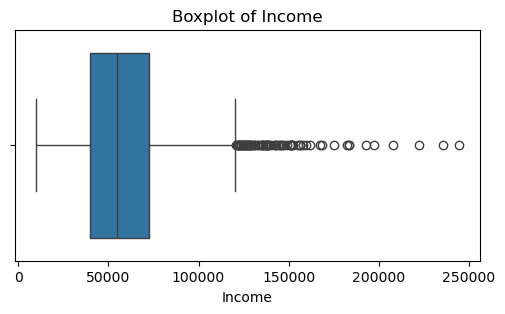

(78, -8782.0, 120914.0)

In [9]:

plt.figure(figsize=(6, 3))
sns.boxplot(x=df['Income'])
plt.title("Boxplot of Income")
plt.show()

Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
len(outliers), lower_bound, upper_bound


We **keep** outliers because extreme incomes are meaningful for census analysis.

### 2.3 Correlation Heatmap

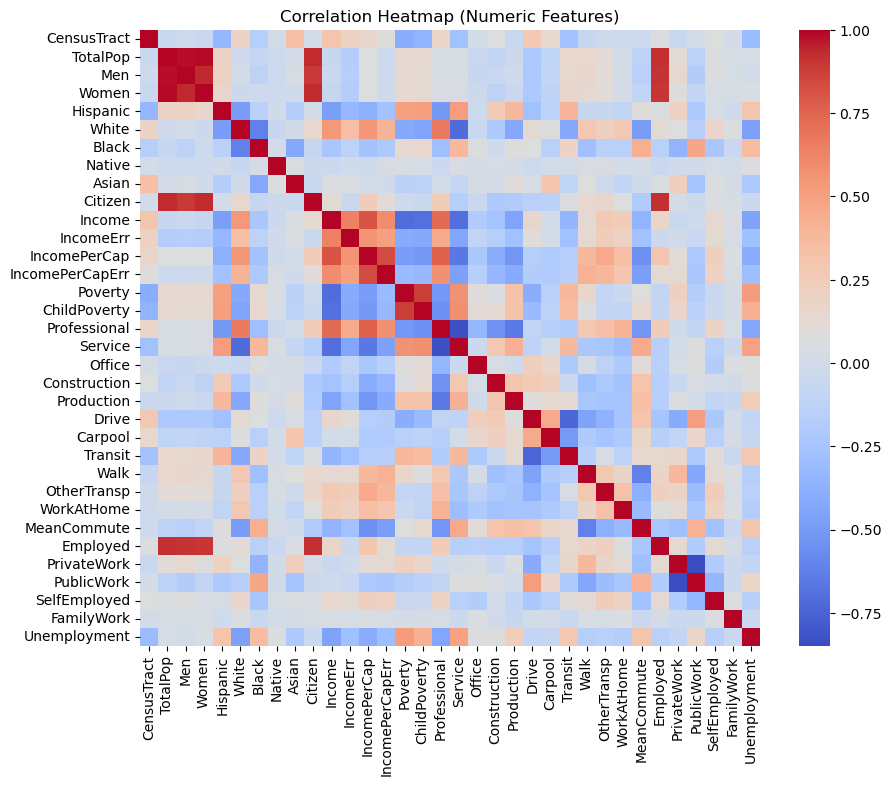

In [10]:

plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


## 3. Feature Engineering – HighIncome Target & Encoding

In [11]:

# Create binary HighIncome target based on median Income
median_income = df['Income'].median()
df['HighIncome'] = (df['Income'] > median_income).astype(int)
df['HighIncome'].value_counts()


HighIncome
0    1117
1    1050
Name: count, dtype: int64

In [12]:

# One-hot encode Borough & County
df = pd.get_dummies(df, columns=['Borough', 'County'], drop_first=True)

# Drop ID-like and leakage columns
drop_cols = ['CensusTract', 'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr']
existing_drop = [c for c in drop_cols if c in df.columns]
df = df.drop(columns=existing_drop)

# Define X and y
X = df.drop(columns=['HighIncome'])
y = df['HighIncome']

X.shape, y.shape


((2167, 37), (2167,))

## 4. Train/Test Split & Scaling

In [13]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((1733, 37), (434, 37))

### 4.1 PCA Visualization

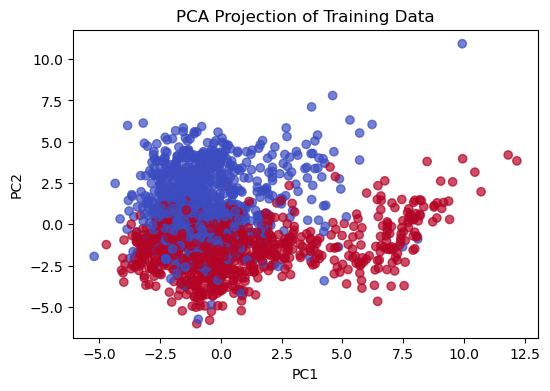

In [14]:

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(6, 4))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection of Training Data")
plt.show()


## 5. Model Training – SVM, Logistic Regression, SGD

In [15]:

svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

sgd_clf = SGDClassifier(loss='hinge', max_iter=1000, random_state=42)
sgd_clf.fit(X_train_scaled, y_train)


SGDClassifier(random_state=42)

### 5.1 Evaluation Helper & Test Results

In [16]:

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

results = {
    "SVM Linear": evaluate_model(svm_linear, X_test_scaled, y_test),
    "SVM RBF": evaluate_model(svm_rbf, X_test_scaled, y_test),
    "Logistic Regression": evaluate_model(log_reg, X_test_scaled, y_test),
    "SGDClassifier": evaluate_model(sgd_clf, X_test_scaled, y_test)
}

pd.DataFrame(results).T


,Accuracy,Precision,Recall,F1 Score
SVM Linear,0.880184,0.852679,0.909524,0.880184
SVM RBF,0.882488,0.869767,0.890476,0.880000
Logistic Regression,0.877880,0.852018,0.904762,0.877598
SGDClassifier,0.815668,0.775424,0.871429,0.820628


### 5.2 Confusion Matrix – SVM RBF

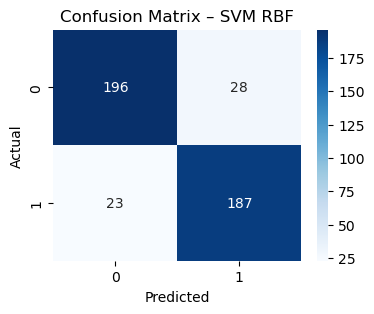

In [17]:

cm = confusion_matrix(y_test, svm_rbf.predict(X_test_scaled))

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – SVM RBF")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 5.3 ROC Curves – SVM RBF vs Logistic Regression

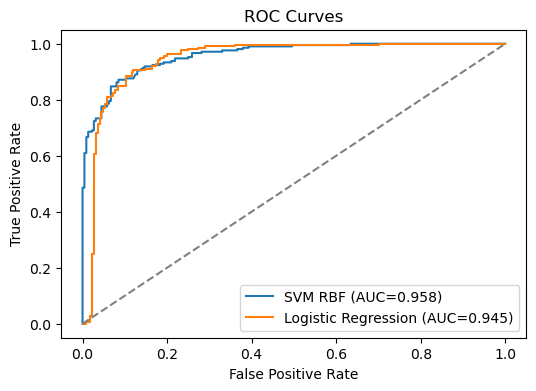

In [18]:

plt.figure(figsize=(6, 4))

for name, model in {"SVM RBF": svm_rbf, "Logistic Regression": log_reg}.items():
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()


## 6. Hyperparameter Tuning – SVM RBF

In [23]:

param_grid = {
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto", 0.01, 0.001],
    "kernel": ["rbf"]
}

grid_search = GridSearchCV(
    SVC(probability=True, random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)
grid_search.best_params_, grid_search.best_score_


({'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}, 0.8782479052489547)

In [22]:

best_svm = grid_search.best_estimator_
best_results = evaluate_model(best_svm, X_test_scaled, y_test)
best_results


{'Accuracy': 0.8847926267281107,
 'Precision': 0.8669724770642202,
 'Recall': 0.9,
 'F1 Score': 0.883177570093458}

## 7. Learning Curves & Error vs Training Size – SVM RBF

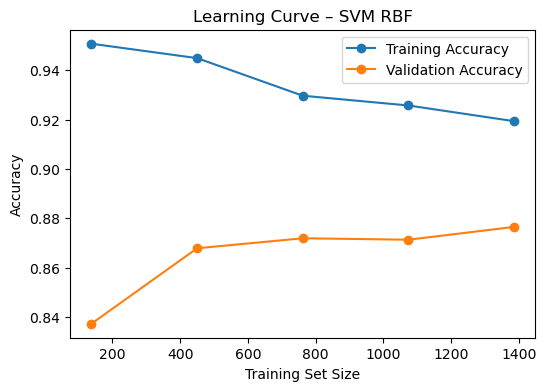

In [24]:

train_sizes, train_scores, test_scores = learning_curve(
    svm_rbf,
    X_train_scaled,
    y_train,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_mean, marker="o", label="Training Accuracy")
plt.plot(train_sizes, test_mean, marker="o", label="Validation Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve – SVM RBF")
plt.legend()
plt.show()


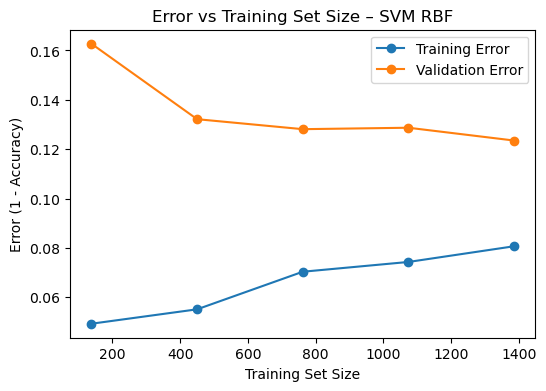

In [25]:

# Convert accuracy to error for error vs training size plot
train_error = 1 - train_mean
val_error = 1 - test_mean

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_error, marker="o", label="Training Error")
plt.plot(train_sizes, val_error, marker="o", label="Validation Error")
plt.xlabel("Training Set Size")
plt.ylabel("Error (1 - Accuracy)")
plt.title("Error vs Training Set Size – SVM RBF")
plt.legend()
plt.show()


## 8. Final Model Comparison

In [26]:

all_results = pd.DataFrame(results).T
all_results.loc["Best SVM (Tuned)"] = best_results
all_results


,Accuracy,Precision,Recall,F1 Score
SVM Linear,0.880184,0.852679,0.909524,0.880184
SVM RBF,0.882488,0.869767,0.890476,0.880000
Logistic Regression,0.877880,0.852018,0.904762,0.877598
SGDClassifier,0.815668,0.775424,0.871429,0.820628
Best SVM (Tuned),0.884793,0.866972,0.900000,0.883178


This table can be used directly in your **Word report** and **PowerPoint slides** to discuss which model performed best and why (e.g., SVM RBF with tuned hyperparameters).